# put all IMPORTS below

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# DATA PROCESSING

In [11]:
df = pd.read_csv('Salary.csv')

# data preprocessing
X = df.drop(columns=['Salary'])
# set target variable
y = df['Salary'].values.reshape(-1, 1)
# values.reshape turns the column into a 2D array

In [12]:
df.head

<bound method NDFrame.head of        Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                 

In [13]:
## Data Understanding
# dataset statistics.
print("X shapes: ", X.shape)
print("y shapes: ", y.shape)
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

X shapes:  (6684, 8)
y shapes:  (6684, 1)
               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (tot

In [14]:
# unique elements
print("Job titles: ", df['Job Title'].value_counts())
print("Countries: ", df['Country'].value_counts())
print("Races: ", df['Race'].value_counts())

Job titles:  Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64
Countries:  Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Races:  Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [15]:
# broaden categories
categories = {
    # technology
    'Software Engineer': 'Technology',
    'Data Analyst': 'Technology',
    'Web Developer': 'Technology',
    'Software Manager': 'Technology',
    'Data Engineer': 'Technology',
    'Full Stack Engineer': 'Technology',
    'Software Architect': 'Technology',
    'Software Developer': 'Technology',
    'Software Engineer Manager': 'Technology',
    'Front End Developer': 'Technology',
    'Front end Developer': 'Technology',
    'Back end Developer': 'Technology',
    'Network Engineer': 'Technology',
    'Developer': 'Technology',    
    'Director of Engineering': 'Technology',  
    'Engineer': 'Technology',  
    'Project Engineer': 'Technology',
    'Principal Engineer': 'Technology',
    'Software Project Manager': 'Technology',

    # business
    'Sales Associate': 'Business',
    'Marketing Analyst': 'Business',
    'Marketing Coordinator': 'Business',
    'Financial Analyst': 'Business',
    'Marketing Manager': 'Business',
    'Sales Director': 'Business',
    'Business Analyst': 'Business',
    'Financial Manager': 'Business',
    'Consultant': 'Business',
    'Account Manager': 'Business',
    'Account Executive': 'Business',
    'Customer Success Manager': 'Business',
    'Business Development Manager': 'Business',
    'Business Operations Analyst': 'Business',
    'Strategy Consultant': 'Business',
    'Accountant': 'Business',
    'Business Development Associate': 'Business',
    'Business Intelligence Analyst': 'Business',
    'Content Marketing Manager': 'Business',
    'Digital Marketing Manager': 'Business',
    'Digital Marketing Specialist': 'Business',
    'Director of Business Development': 'Business',
    'Director of Finance': 'Business',
    'Director of Marketing': 'Business',
    'Director of Product Management': 'Business',
    'Director of Sales': 'Business',
    'Director of Sales and Marketing': 'Business',
    'Financial Advisor': 'Business',
    'Marketing Director': 'Business',
    'Marketing Specialist': 'Business',
    'Product Marketing Manager': 'Business',
    'Quality Assurance Analyst': 'Business',
    'Sales Associate': 'Business',
    'Sales Executive': 'Business',
    'Sales Manager': 'Business',
    'Sales Operations Manager': 'Business',
    'Sales Representative': 'Business',
    'Supply Chain Analyst': 'Business',
    'Supply Chain Manager': 'Business',
    'VP of Finance': 'Business',
    'Product Development Manager': 'Business',

    # human resources
    'HR Manager': 'Human Resources',
    'Customer Service Rep': 'Human Resources',
    'Recruiter': 'Human Resources',
    'HR Generalist': 'Human Resources',
    'HR Coordinator': 'Human Resources',
    'Human Resources Manager': 'Human Resources',
    'HR Specialist': 'Human Resources',
    'Technical Recruiter': 'Human Resources',
    'Administrative Assistant': 'Human Resources',
    'Advertising Coordinator': 'Human Resources',
    'Copywriter': 'Human Resources',
    'Customer Service Manager': 'Human Resources',
    'Customer Service Representative': 'Human Resources',
    'Customer Success Rep': 'Human Resources',
    'Customer Support Specialist': 'Human Resources',
    'Director': 'Human Resources',
    'Director of HR': 'Human Resources',
    'Director of Human Capital': 'Human Resources', 
    'Director of Human Resources': 'Human Resources', 
    'Director of Operations': 'Human Resources', 
    'Event Coordinator': 'Human Resources', 
    'Human Resources Coordinator': 'Human Resources',
    'Juniour HR Coordinator': 'Human Resources',
    'Juniour HR Generalist': 'Human Resources',
    'Public Relations Manager': 'Human Resources',
    'Human Resources Specialist': 'Human Resources',
    'Human Resources Director': 'Human Resources',

    # information technology
    'IT Support Specialist': 'Information Technology',
    'Help Desk Analyst': 'Information Technology',
    'IT Project Manager': 'Information Technology',
    'IT Support': 'Information Technology',
    'IT Manager': 'Information Technology',
    'Chief Data Officer': 'Information Technology',
    'Chief Technology Officer': 'Information Technology',
    'IT Consultant': 'Information Technology',
    'Technical Support Specialist': 'Information Technology',

    # social media
    'Social Media Specialist': 'Social Media',
    'Social Media Manager': 'Social Media',
    'Social Media Man': 'Social Media',

    # design
    'Graphic Designer': 'Design',
    'UX Designer': 'Design',
    'Creative Director': 'Design',
    'Digital Content Producer': 'Design',
    'Designer': 'Design',
    'Web Designer': 'Design',
    'Product Designer': 'Design',
    'UX Researcher': 'Design',

    # research and science
    'Data Scientist': 'Research and Science',
    'Research Scientist': 'Research and Science',
    'Principal Scientist': 'Research and Science',
    'Researcher': 'Research and Science',
    'Director of Data Science': 'Research and Science',
    'Research Director': 'Research and Science',
    'Scientist': 'Research and Science',


    # miscellaneous
    'Manager': 'Miscellaneous',
    'Product Manager': 'Miscellaneous',
    'Project Manager': 'Miscellaneous',
    'Operations Manager': 'Miscellaneous',
    'Data Entry Clerk': 'Miscellaneous',
    'VP of Operations': 'Miscellaneous',
    'Operations Director': 'Miscellaneous',
    'CEO': 'Miscellaneous',
    'Delivery Driver': 'Miscellaneous',
    'Office Manager': 'Miscellaneous',
    'Operations Analyst': 'Miscellaneous',
    'Operations Coordinator': 'Miscellaneous',
    'Project Coordinator': 'Miscellaneous',
    'Receptionist': 'Miscellaneous',
    'Technical Writer': 'Miscellaneous',
    'Training Specialist': 'Miscellaneous',

}


print(df['Job Title'].unique())

for category in categories:
    for i in range(len(df['Job Title'])):
        if category == df['Job Title'][i]:
            df.loc[i, 'Job Title'] = categories[category]

print(df['Job Title'].unique())

['Software Engineer' 'Data Analyst' 'Manager' 'Sales Associate' 'Director'
 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Scientist' 'Software Developer' 'HR Manager'
 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Engineer' 'Data Entry Clerk'
 'Sales Director' 'Business Analyst' 'VP of Operations' 'IT Support'
 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Developer' 'Consultant' 'Product Designer' 'CEO'
 'Accountant' 'Data Scientist' 'Marketing Specialist' 'Technical Writer'
 'HR Generalist' 'Project Engineer' 'Customer Success Rep'
 'Sales Executive' 'UX Designer' 'Operations Director' 'Network Engineer'
 'Administrative Assistant' 'Strategy Consultant' 'Copywriter'
 'Account Manager' 'Director of Marketing' 'Help Desk Analyst'
 'Customer Service Manager' 'Business Intelligence Analyst'
 'Event Coordinator' 'VP of Finance' 'Graphic Designer' 'UX Researcher'
 'S

# ONE HOT ENCODING

In [16]:
# eliminating columns with strings and the column with the target variable
# TEST: One-hot encoding
#df = df.drop(columns=['Job Title'])
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
       Age  Education Level  Years of Experience    Salary  Senior  \
0     32.0                1                  5.0   90000.0       0   
1     28.0                2                  3.0   65000.0       0   
2     45.0                3                 15.0  150000.0       1   
3     36.0                1                  7.0   60000.0       0   
4     52.0                2                 20.0  200000.0       0   
...    ...              ...                  ...       ...     ...   
6679  49.0                3                 20.0  200000.0       0   
6680  32.0                0                  3.0   50000.0       0   
6681  30.0                1                  4.0   55000.0       0   
6682  46.0                2                 14.0  140000.0       0   
6683  26.0                0                  1.0   35000.0       0   

      Gender_Female  Gender_Male  Job Title_Business  Job Title_Design  \
0               0.0          1.0                 0.0        

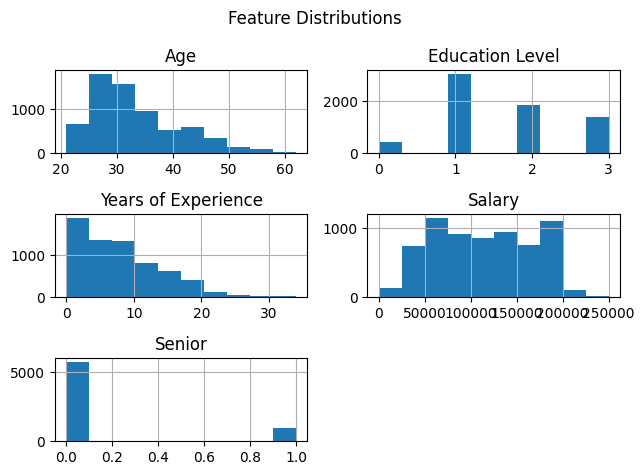

In [17]:
#histagram histribution.
df.hist()

plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

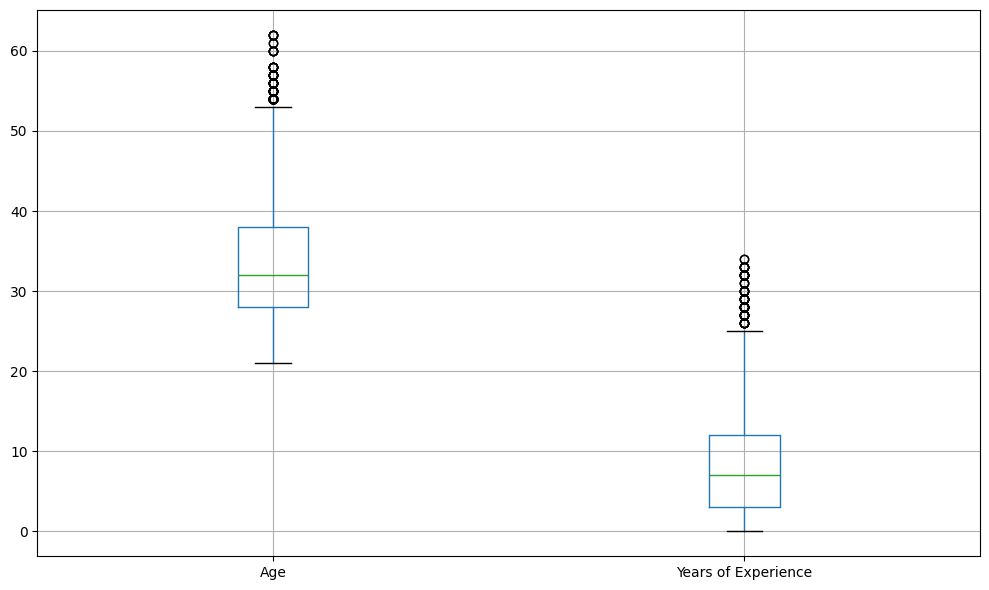

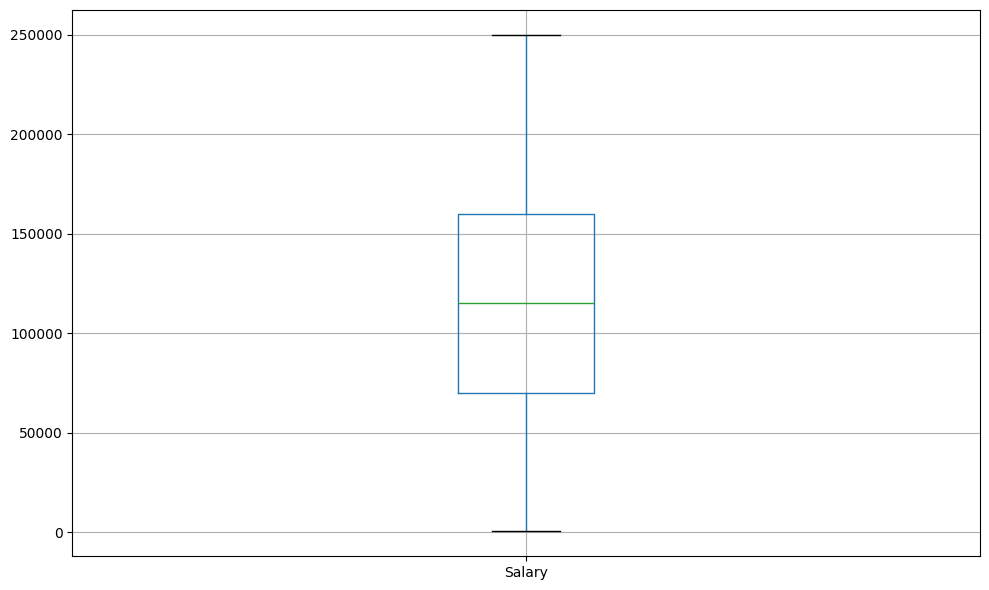

Age's lower outliers:
(119,)
Years of Experience's lower outliers:
(69,)


In [18]:
# find outliers with boxplot
df.boxplot(column=['Age', 'Years of Experience'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
df.boxplot(column=['Salary'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary']
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[feature] < lower_bound
    outliers_upper = df[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"{feature}'s lower outliers:\n{df_encoded.loc[outliers_upper, feature].shape}")
    if outliers_lower.any():
        print(f"{feature}'s lower outliers:\n{df_encoded.loc[outliers_lower, feature].shape}")
        
    df_encoded.loc[outliers_lower, feature] = lower_bound 
    df_encoded.loc[outliers_upper, feature] = upper_bound

# FIND CORRELATION MATRIX

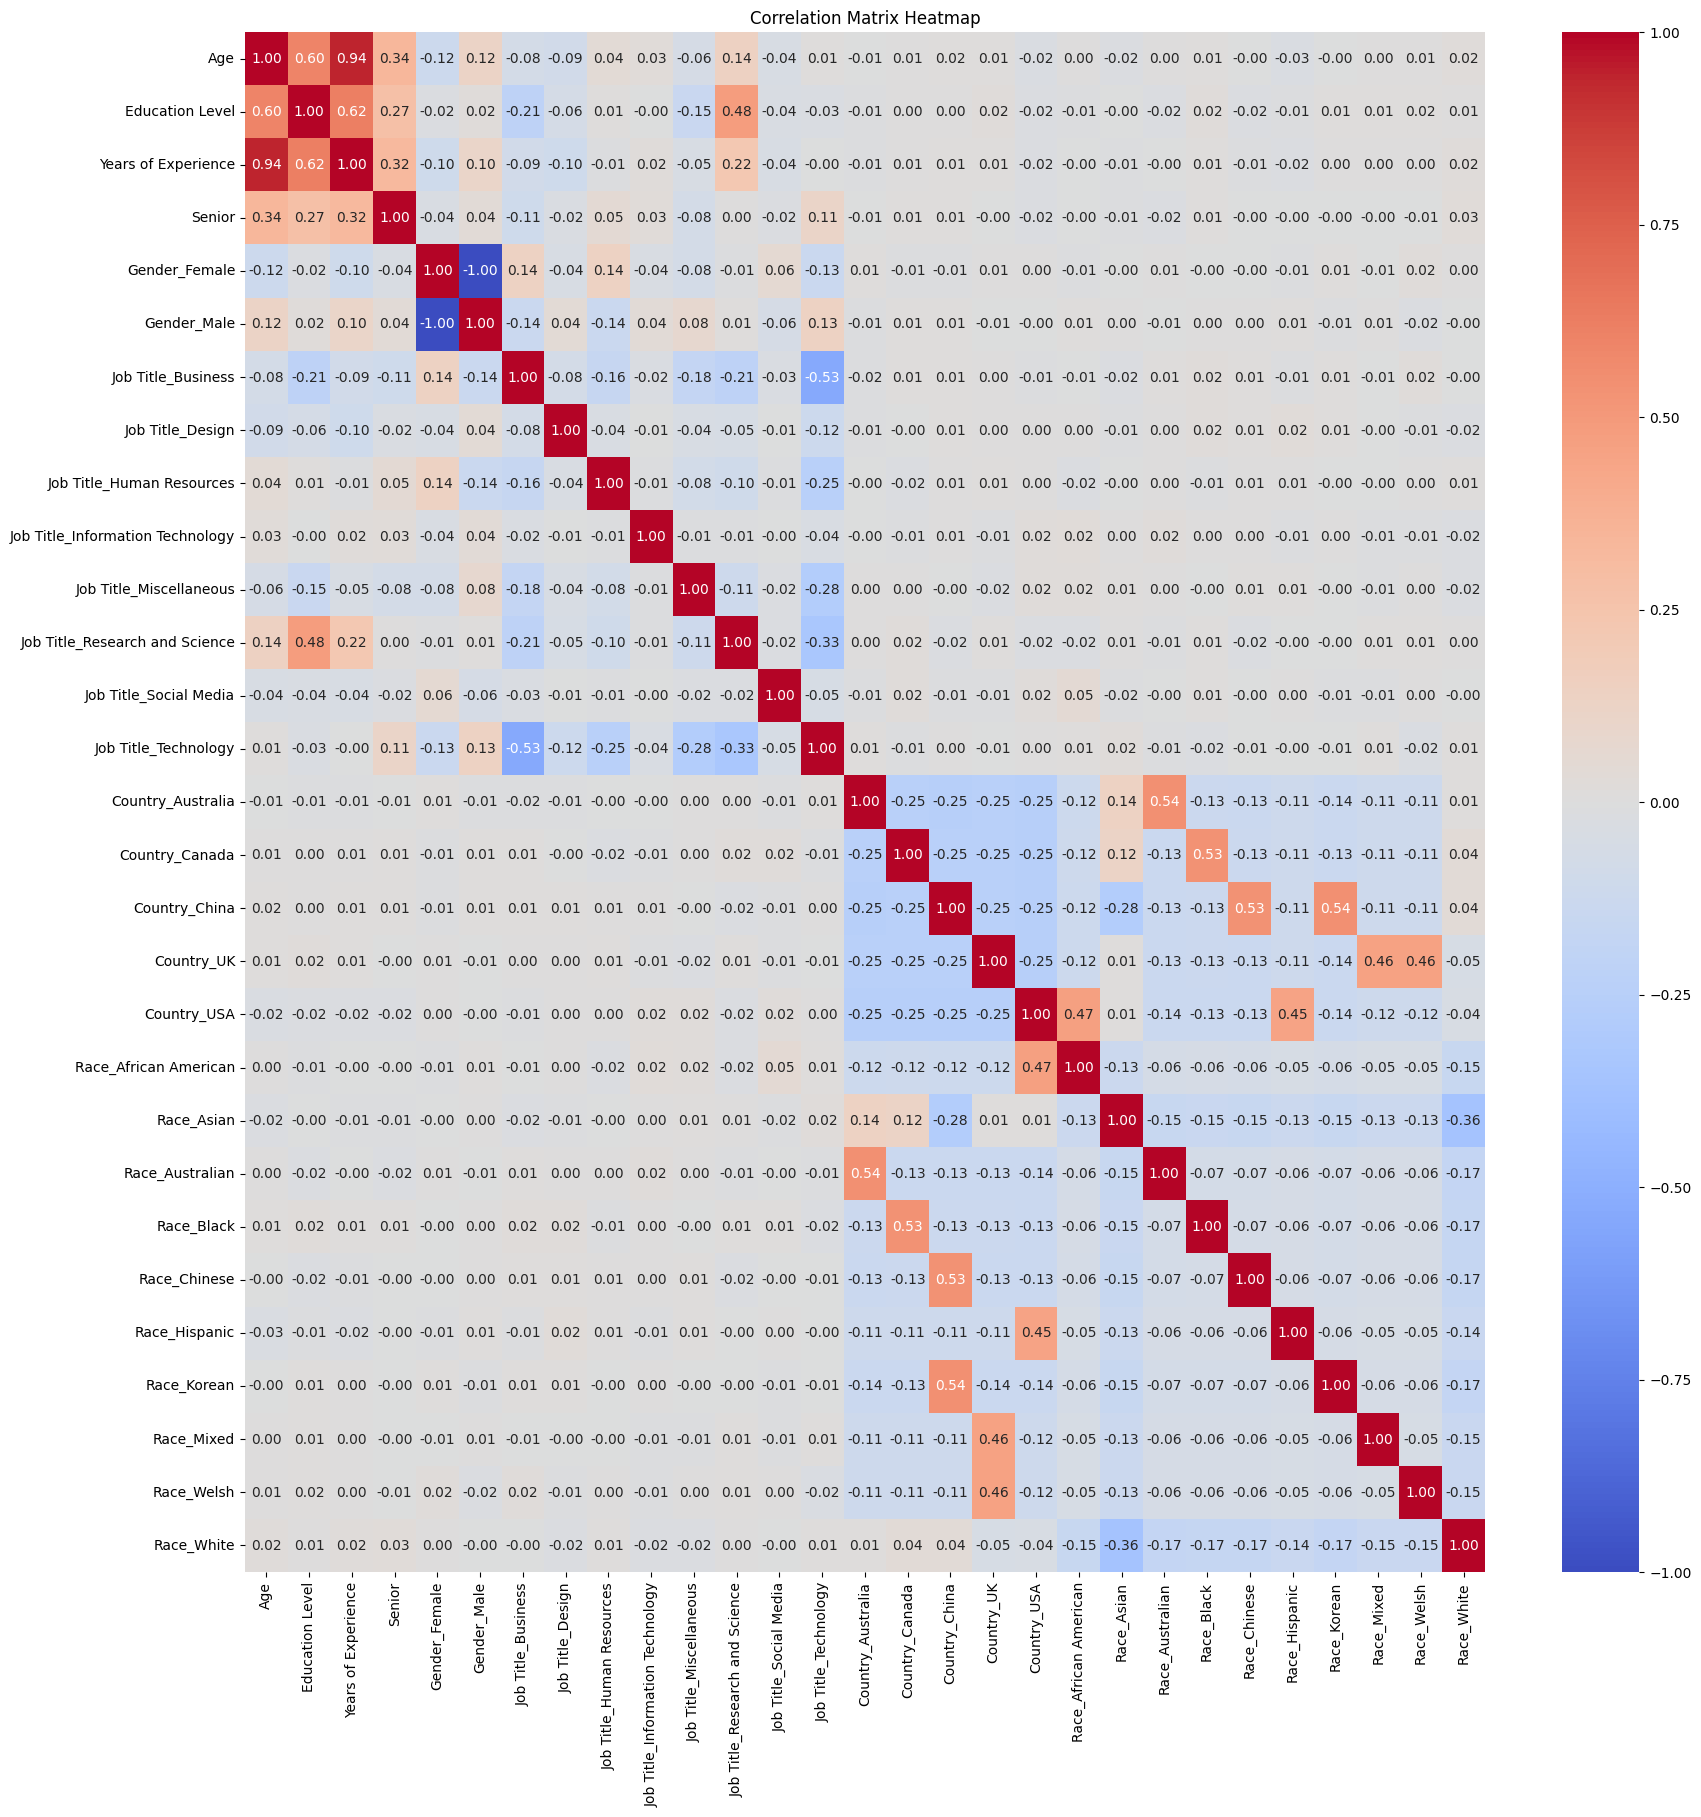

In [19]:
# finding correlation

# using normalized_X does not work because it is a numpy array
scaler = StandardScaler()
X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary'].values.reshape(-1, 1)

# find correlation (use code from lab 0)
correlation_matrix = X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# feature selection
# eliminate features that are highly correlated to reduce overfitting and improve the overall accuracy of the model

# example: eliminate either age or years of experience because they have a correlation of 0.94
X = X.drop(columns=['Age'])

# potientially use PCA here, looking varience of different features

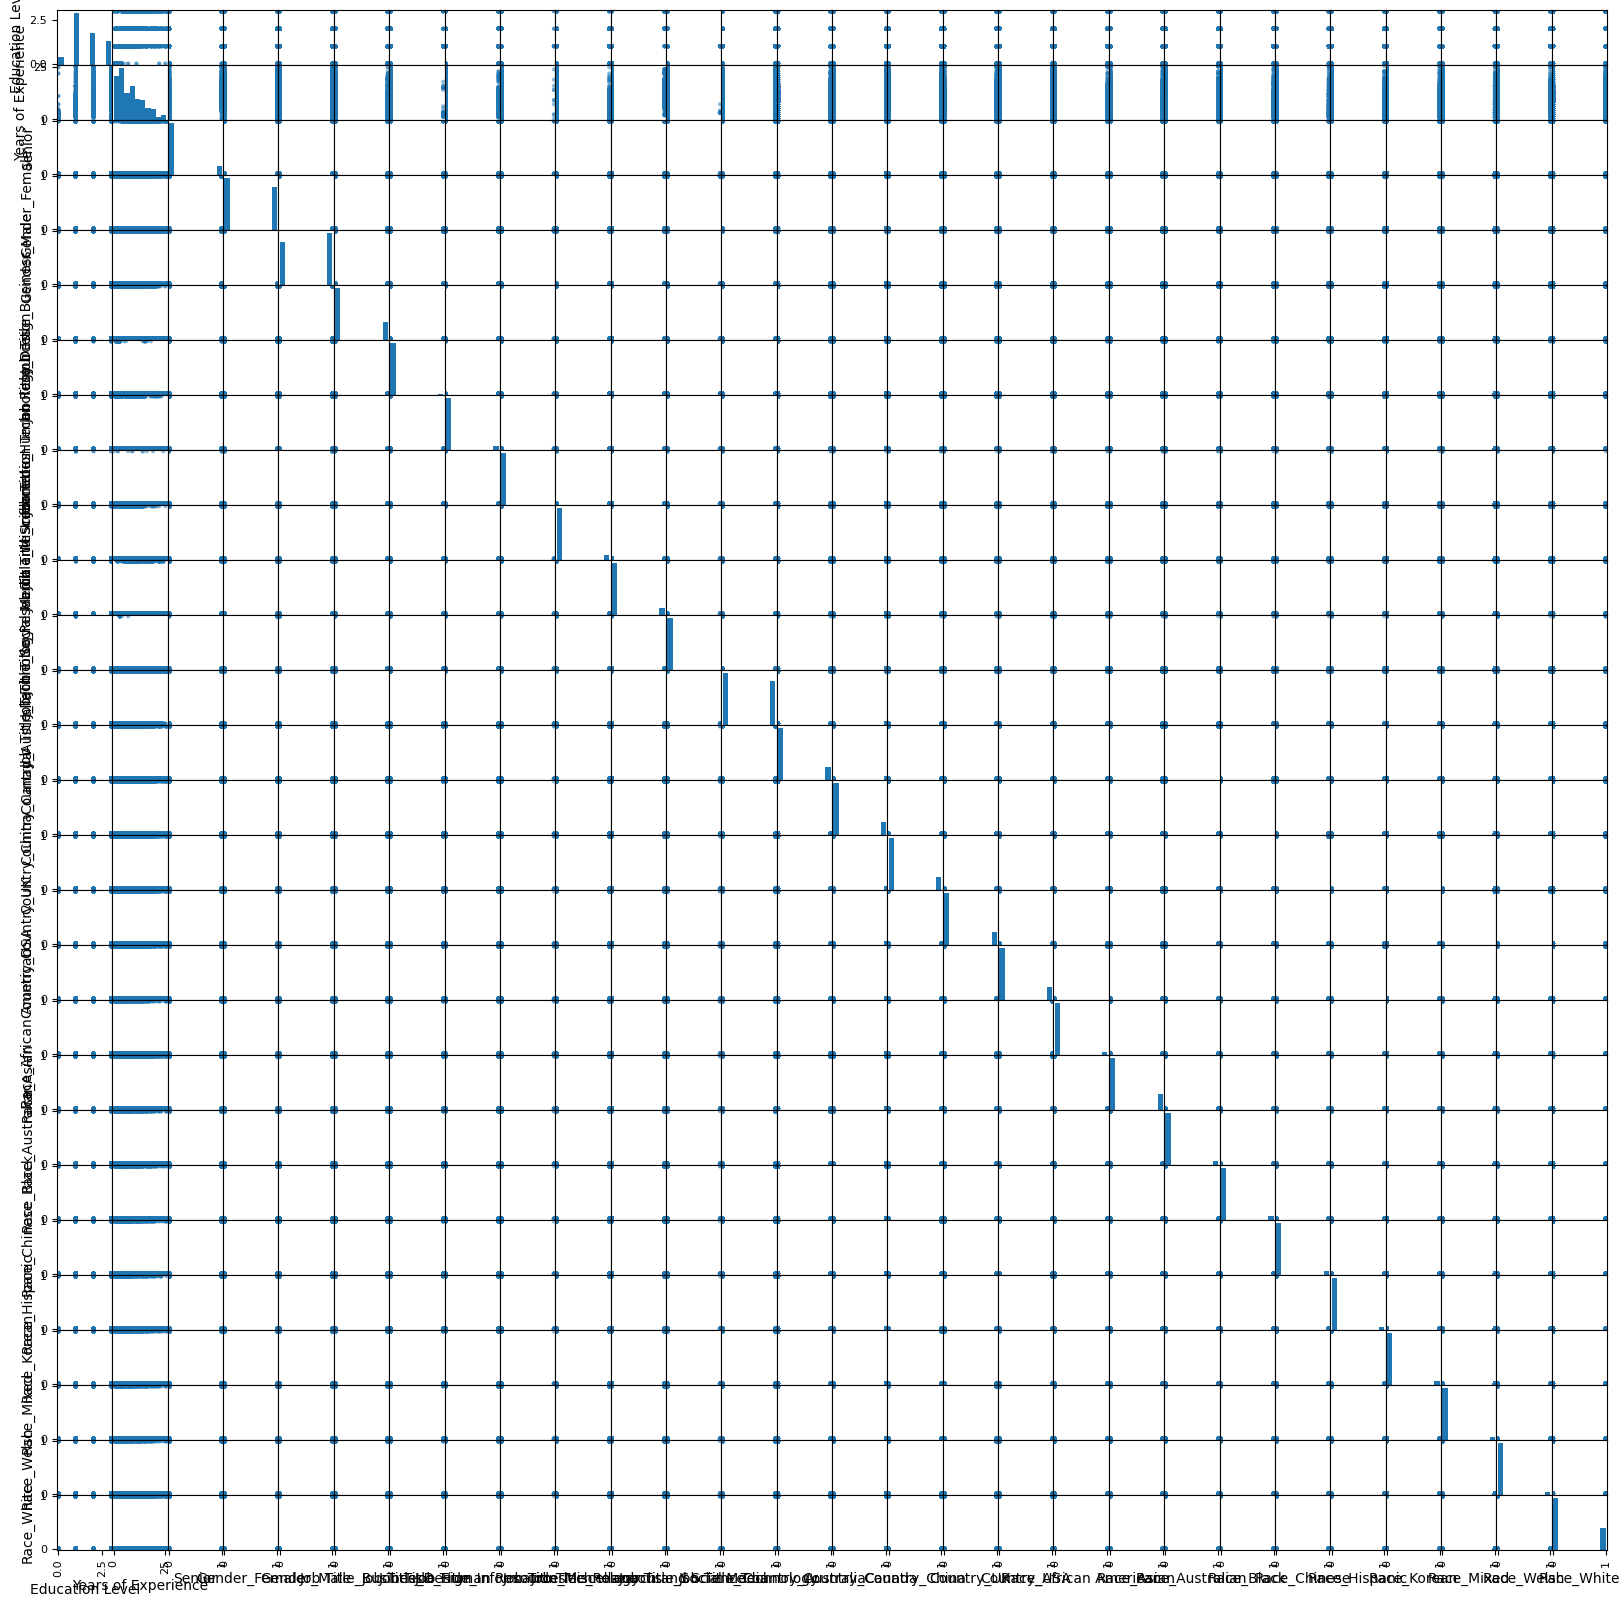

In [20]:
pd.plotting.scatter_matrix(X, figsize=(20, 20))
plt.show()

# LINEAR MODEL CONSTRUCTION

In [21]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
# data standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
    
# train model on training data.
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
r2 = r2_score(y_test, y_pred)
print("r2", r2)

bias2 = np.mean((np.mean(y_pred) - y_test) ** 2)
variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
print("Variance: ", variance, " Bias2: ", bias2)

MSE:  662921884.8366396
r2 0.7609393358967027
Variance:  2095083956.556221  Bias2:  2773117216.412528


# POLYNOMIAL FEATURES

In [22]:
# polynomial regression (Lab 1)

def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Split data into training and testing sets for this fold
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)
    
    # data standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate variance and bias for this fold
    variance = np.mean((np.mean(y_pred)-y_pred)**2)
    bias2 = np.mean((np.mean(y_pred)- y_test) ** 2)

    # Print results for this fold
    print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance, bias2, bias2 + variance))

    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse , r2

degrees = range(1, 4)  # polynomial degrees from 1 to 5
mse_list = []
r2_list = []
for i in degrees:
    mse, r2 = polynomial_regression(i, X, y, 5)
    mse_list.append(mse)
    r2_list.append(r2)

for i in degrees:  # print mse
    print("Degree:", i, "MSE:", mse_list[i - 1], " r2: ", r2_list[i - 1])

Variance: 2107525029.1645, Bias2: 2773029025.6675, Total error: 4880554054.8321
Variance: 4539692344110026707182149812879360.0000, Bias2: 327411946277338151628795019264.0000, Total error: 4540019756056304301476007414595584.0000
Variance: 16622720149120154743922739392806912.0000, Bias2: 3644216703833654996221139353600.0000, Total error: 16626364365823988940476815723462656.0000
Degree: 1 MSE: 665028737.6333008  r2:  0.7601795697157117
Degree: 2 MSE: 4.5400197560563135e+33  r2:  -1.6372066796261624e+24
Degree: 3 MSE: 1.662636436582374e+34  r2:  -5.995743688408609e+24


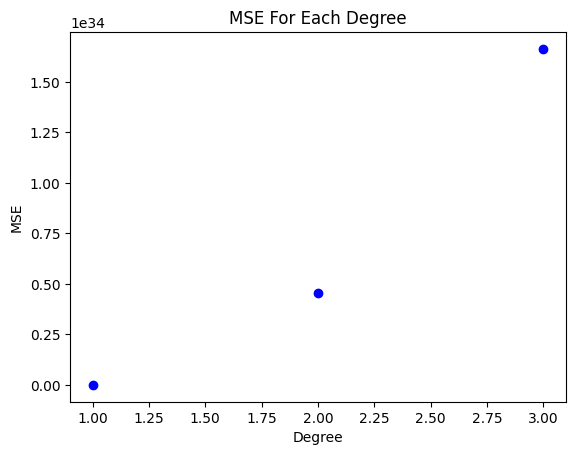

In [23]:
plt.scatter(degrees, mse_list, color='blue')
plt.title('MSE For Each Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

In [ ]:
# HW2
# When this is fixed move this whole thing in the import box
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier


# Identify categorical and numeric columns in X
categorical_columns = X.select_dtypes(include=["object"]).columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns

# preprocessing pipeline to handle both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),  # Scale numeric columns
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),  # One-hot encode categorical columns
    ]
)

# Apply preprocessing pipeline
X_scaled = preprocessor.fit_transform(X)

# Define create_model function for KerasClassifier
def create_model(num_layers=1, num_neurons=64, activation="relu", dropout_rate=0.0, momentum=0.9):
    model = Sequential()
    model.add(Input(shape=(X_scaled.shape[1],)))  # Explicitly define the input layer
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="linear"))  # Use 'linear' for regression tasks
    optimizer = SGD(learning_rate=0.01, momentum=momentum)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mae"])
    return model

# parameters grid for GridSearchCV
# do not rename model__ because it is needed for GridSearchCV for scikeras
param_grid = {
    "model__num_layers": [3],
    "model__num_neurons": [32, 64],
    "model__activation": ["relu", "tanh"],
    "model__dropout_rate": [0.2, 0.5],
    "model__momentum": [0.5, 0.9],
}

# Create KerasClassifier wrapper for scikit-learn
model = KerasClassifier(
    model=create_model,
    epochs=10,
    batch_size=32,
    verbose=0
)

# Perform grid search with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring="neg_mean_squared_error")
grid_result = grid_search.fit(X_scaled, y)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))


Best: -15994052402.520075 using {'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__momentum': 0.5, 'model__num_layers': 3, 'model__num_neurons': 32}
-15994052402.520075 (454340019.209378) with: {'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__momentum': 0.5, 'model__num_layers': 3, 'model__num_neurons': 32}
-15994052402.520075 (454340019.209378) with: {'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__momentum': 0.5, 'model__num_layers': 3, 'model__num_neurons': 64}
-15994052402.520075 (454340019.209378) with: {'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__momentum': 0.9, 'model__num_layers': 3, 'model__num_neurons': 32}
-15994052402.520075 (454340019.209378) with: {'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__momentum': 0.9, 'model__num_layers': 3, 'model__num_neurons': 64}
-15994052402.520075 (454340019.209378) with: {'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__momentum': 0.5, '